### Analysis of Pima Indians diabetes incidence

#### The objective of this project is to study a large data set collected from the Pima Indian women and analyse the relationship between multiple parameters to the presence of diabetes. Addtionally, predictive models are developed and tested to determine the accuray to which diabetes incidence can be predicted in this population. 

#### The data set is composed of 768 instances of female patients 21 years and older of Pima Indian heritage. It was made availble by The National institutes of Diabetes and Digestive and Kidney Diseases and  donated by Dr. Vincent Sigillito, The John Hopkins University. 

#### The data is composed of 9 attributes: Number of times pregnant, Plasma glucose concentration at 2 hours in oral glucose tolerance test, Diastolic blood preassure (mm Hg), Tricepts skin fold (mm), 2-Hour serum insulin (mu U/ml), Body mass index (weight Kg/ height m)^2, Diabetes pedigree function, Age, and class (0 or 1) where 0 = no diabetes and 1 = yes diabetes.

#### This project work includes: 1. data screening, processing, & cleaning, 2. correlation & covariance estimation & visulizations, 3. exploratory data analysis in which factors that may affect the patient classfication are  visualized, 4. machine learning model training & building including feature selection by recursive feature elimination, 5. machine learning model evaluation & selction, 6. customization & tuning of selected model, and 7. testing of the finalized selected model.

In [1]:
import pandas as pd
from pandas import Series, DataFrame
# import matplotlib.pyplot for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 6.0)

#### Import the data set

In [2]:
Pima=pd.read_csv('pima-indians-diabetes_mod.csv')

#### Data screening, cleaning, and preprocessing

In [3]:
Pima.head()

,Patient num,Pregnancies,Plasma_Glucose,Dia_BP,Tri_skin_mm,Serum_insulin,BMI,Dia_pedi_funct,Age,Class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# rename column so no spaces between words
Pima.rename(columns = {'Patient num':'Patient_num'}, inplace= True)
Pima.head()

,Patient_num,Pregnancies,Plasma_Glucose,Dia_BP,Tri_skin_mm,Serum_insulin,BMI,Dia_pedi_funct,Age,Class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# obtain information about the data:
Pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Patient_num       768 non-null int64
Pregnancies       768 non-null int64
Plasma_Glucose    768 non-null int64
Dia_BP            768 non-null int64
Tri_skin_mm       768 non-null int64
Serum_insulin     768 non-null int64
BMI               768 non-null float64
Dia_pedi_funct    768 non-null float64
Age               768 non-null int64
Class             768 non-null int64
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


In [6]:
# statistic information 
Pima.describe()

,Patient_num,Pregnancies,Plasma_Glucose,Dia_BP,Tri_skin_mm,Serum_insulin,BMI,Dia_pedi_funct,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,384.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,192.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,384.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,576.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,768.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### From looking at the statistics table we can see that some columns have 0 as a minimal value. In some of the column a 0 value would indicate missing data since 0 is not a physioligical posiblity.

In [7]:
# Determine the # of missing values (in this case 0s) for each column of interest
missing_values = (Pima[['Plasma_Glucose','Dia_BP', 'Tri_skin_mm', 'Serum_insulin','BMI']]==0).sum()
print(missing_values)

Plasma_Glucose      5
Dia_BP             35
Tri_skin_mm       227
Serum_insulin     374
BMI                11
dtype: int64


In [8]:
# if columns are numbered instead of named the missing values can be counted by: num_missing = (Pima [[2,3,4,5,6]]==0).sum()

In [9]:
# import NaN from Numpy. in python we use NaN to for missing values
from numpy import nan

In [10]:
# replace missing values with NaN
Pima[['Plasma_Glucose','Dia_BP', 'Tri_skin_mm', 'Serum_insulin','BMI']] = Pima[['Plasma_Glucose','Dia_BP', 'Tri_skin_mm', 'Serum_insulin','BMI']].replace(0,nan)

In [11]:
# determine the number of missing values in each column
print(Pima.isnull().sum())

Patient_num         0
Pregnancies         0
Plasma_Glucose      5
Dia_BP             35
Tri_skin_mm       227
Serum_insulin     374
BMI                11
Dia_pedi_funct      0
Age                 0
Class               0
dtype: int64


In [12]:
# look at the first 10 row to see the missing values have been replaced with Nan
Pima.head(10)

,Patient_num,Pregnancies,Plasma_Glucose,Dia_BP,Tri_skin_mm,Serum_insulin,BMI,Dia_pedi_funct,Age,Class
0,1,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,2,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,3,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,6,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,7,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,8,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,9,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,10,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


#### One way to deal with missing values is to remove the samples where data is missing:

In [13]:
# Create new data set while removing rows (samples) with missing values
Pima1=Pima.dropna()


In [14]:
Pima1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 10 columns):
Patient_num       392 non-null int64
Pregnancies       392 non-null int64
Plasma_Glucose    392 non-null float64
Dia_BP            392 non-null float64
Tri_skin_mm       392 non-null float64
Serum_insulin     392 non-null float64
BMI               392 non-null float64
Dia_pedi_funct    392 non-null float64
Age               392 non-null int64
Class             392 non-null int64
dtypes: float64(6), int64(4)
memory usage: 33.7 KB


In [15]:
Pima1.head()

,Patient_num,Pregnancies,Plasma_Glucose,Dia_BP,Tri_skin_mm,Serum_insulin,BMI,Dia_pedi_funct,Age,Class
3,4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,7,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,9,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,14,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


#### Another way to handle missing data is to replace the missing values for each column like the mean. 

In [16]:
# create a new data set while replacing the missing values. Here missing values will be
# replaced with the mean of each feature.
Pima2 = Pima.fillna(Pima.mean())
Pima2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Patient_num       768 non-null int64
Pregnancies       768 non-null int64
Plasma_Glucose    768 non-null float64
Dia_BP            768 non-null float64
Tri_skin_mm       768 non-null float64
Serum_insulin     768 non-null float64
BMI               768 non-null float64
Dia_pedi_funct    768 non-null float64
Age               768 non-null int64
Class             768 non-null int64
dtypes: float64(6), int64(4)
memory usage: 60.1 KB


In [17]:
print(Pima2.isnull().sum())

Patient_num       0
Pregnancies       0
Plasma_Glucose    0
Dia_BP            0
Tri_skin_mm       0
Serum_insulin     0
BMI               0
Dia_pedi_funct    0
Age               0
Class             0
dtype: int64


### Correlation and Covarience Estimations: 
#### Here I use the data set where missing data has been removed from data set since it real data

In [18]:
# Looking at Correlation using basic correlation matrix using pandas:
corrMat = Pima1.corr()
print(corrMat)

                Patient_num  Pregnancies  Plasma_Glucose    Dia_BP  \
Patient_num        1.000000    -0.064022       -0.016466  0.049713   
Pregnancies       -0.064022     1.000000        0.198291  0.213355   
Plasma_Glucose    -0.016466     0.198291        1.000000  0.210027   
Dia_BP             0.049713     0.213355        0.210027  1.000000   
Tri_skin_mm        0.005973     0.093209        0.198856  0.232571   
Serum_insulin     -0.017399     0.078984        0.581223  0.098512   
BMI                0.005397    -0.025347        0.209516  0.304403   
Dia_pedi_funct    -0.018185     0.007562        0.140180 -0.015971   
Age               -0.044682     0.679608        0.343641  0.300039   
Class             -0.084278     0.256566        0.515703  0.192673   

                Tri_skin_mm  Serum_insulin       BMI  Dia_pedi_funct  \
Patient_num        0.005973      -0.017399  0.005397       -0.018185   
Pregnancies        0.093209       0.078984 -0.025347        0.007562   
Plasma_Glucos

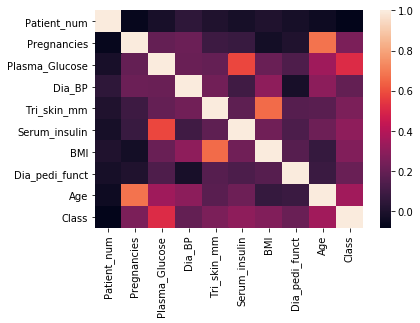

In [19]:
# Correlation Heat map
sns.heatmap(corrMat)

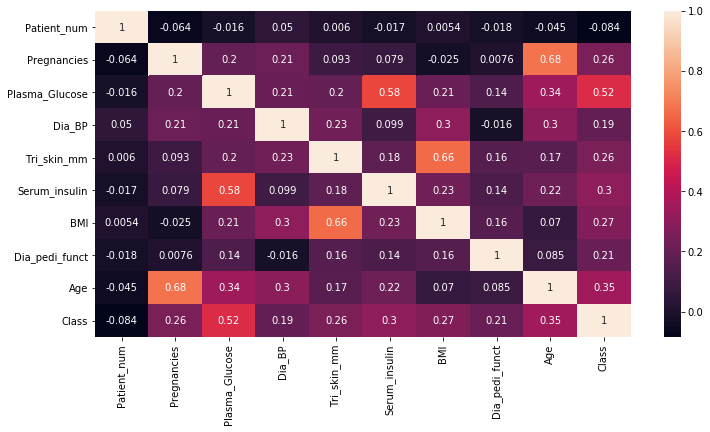

In [20]:
# Correlation heat map
plt.figure(figsize = (12,6))
sns.heatmap(corrMat, annot = True,)

In [21]:
# using covariance to study how changes in one varialbe are associated with changes in a 
# second variable.
# Calculating covariance
covMat = Pima1.cov()
print (covMat)

                 Patient_num  Pregnancies  Plasma_Glucose      Dia_BP  \
Patient_num     46663.109655   -44.413135     -109.767172  134.193825   
Pregnancies       -44.413135    10.313247       19.652043    8.561981   
Plasma_Glucose   -109.767172    19.652043      952.387781   80.994467   
Dia_BP            134.193825     8.561981       80.994467  156.152304   
Tri_skin_mm        13.570104     3.147933       64.537672   30.563156   
Serum_insulin    -446.654640    30.144188     2131.662900  146.295162   
BMI                 8.192793    -0.572058       45.439613   26.732178   
Dia_pedi_funct     -1.357158     0.008390        1.494605   -0.068951   
Age               -98.458486    22.263310      108.179694   38.245916   
Class              -8.582115     0.388408        7.502349    1.134976   

                Tri_skin_mm  Serum_insulin         BMI  Dia_pedi_funct  \
Patient_num       13.570104    -446.654640    8.192793       -1.357158   
Pregnancies        3.147933      30.144188   -0.

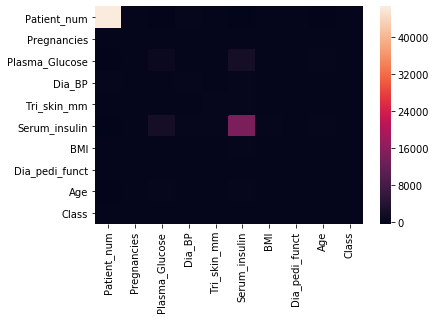

In [22]:
# Covariance heat map
sns.heatmap(covMat)

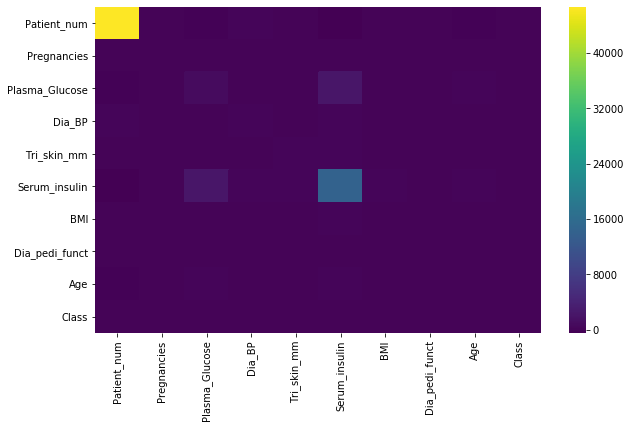

In [23]:
# covariance heat map2
plt.figure(figsize = (10,6))
sns.heatmap(covMat, annot = False, cmap = 'viridis')

### Exploratory Data Analysis For Pima1 patient group

#### Look at the class the patients were classified into:

In [24]:
# Determine the number of patients in each class level (0 = no diabetes, 1 = yes diabetes)
Pima1.groupby('Class')['Class'].count()

Class
0    262
1    130
Name: Class, dtype: int64

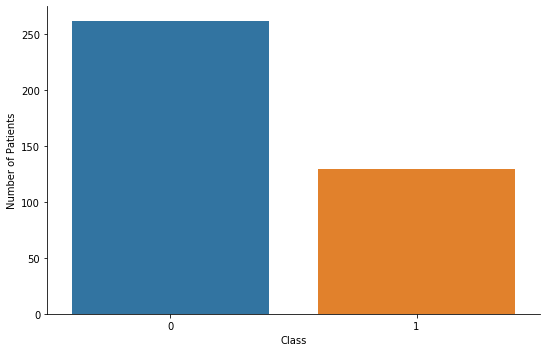

In [25]:
# Use seaborn to plot the patient count in each class ( 0= no diabetes, 1= diabetes)
fg1=sns.catplot('Class', data=Pima1, kind='count', aspect=1.5)
fg1.set_xlabels('Class')
fg1.set_ylabels('Number of Patients')

#### Figure 1. Number of patients classified into category: 0 nondiabetic and 1 diabetic based on the results of the 2 hour glucose test.

#### Look at patient age:

In [26]:
print('The average and median age of patients are %0.f and %0.f years old, respectively.'%(Pima1.Age.mean(),Pima1.Age.median()))

The average and median age of patients are 31 and 27 years old, respectively.


In [27]:
# obtain descriptive statistics for the patients Age
Pima1.Age.describe()

count    392.000000
mean      30.864796
std       10.200777
min       21.000000
25%       23.000000
50%       27.000000
75%       36.000000
max       81.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Distribution of Patient Age')

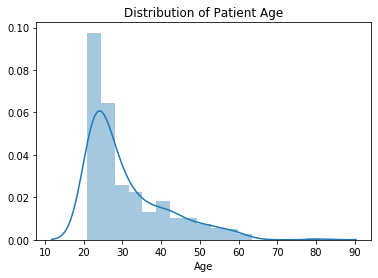

In [28]:
# plot the age distribution with an overlay of density plot
age=Pima1['Age']
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Patient Age")

#### Figure 2. Patient Age distribution with an ovelay density plot. the density plot shows where the highest number of patients are based on age.

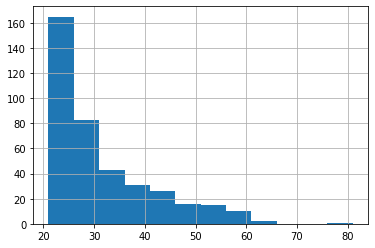

In [29]:
#plot the distribution of age using histogram
Pima1['Age'].hist(bins=12)

#### Figure 3. Is a simple age distribution plot with the ages devided into 12 major groups.

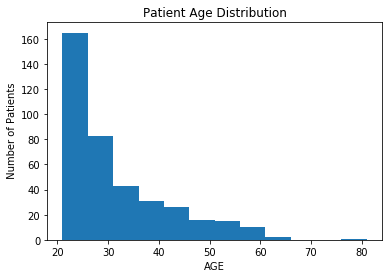

In [30]:
# plot the distribution of age using matplotlib.pyplot
plt.hist(Pima1['Age'],bins=12)
plt.title("Patient Age Distribution")
plt.xlabel("AGE")
plt.ylabel(" Number of Patients")
plt.show()

#### Figure 4. Is a simple age distrbution plot with the ages deved into 12 major groups. This plot include title, and axis labels.

In [31]:
#create a function to define patients by age group (< 35, > 35 but <  50, & >50.)
def middle_older_young(patient):
    Age = patient
    if Age < 35 :return 'young'
    if 35 < Age < 50 :return 'middle'
    if Age > 50 : return 'older'

In [32]:
# add a column to Pima1 describing 'Age Group'
Pima1['Age_Group']=Pima1['Age'].apply(middle_older_young)

C:\Users\Alberto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
Pima1.head(20)

,Patient_num,Pregnancies,Plasma_Glucose,Dia_BP,Tri_skin_mm,Serum_insulin,BMI,Dia_pedi_funct,Age,Class,Age_Group
3,4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,young
4,5,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,young
6,7,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,young
8,9,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,older
13,14,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,older
14,15,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1,older
16,17,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1,young
18,19,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0,young
19,20,1,115.0,70.0,30.0,96.0,34.6,0.529,32,1,young
20,21,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0,young


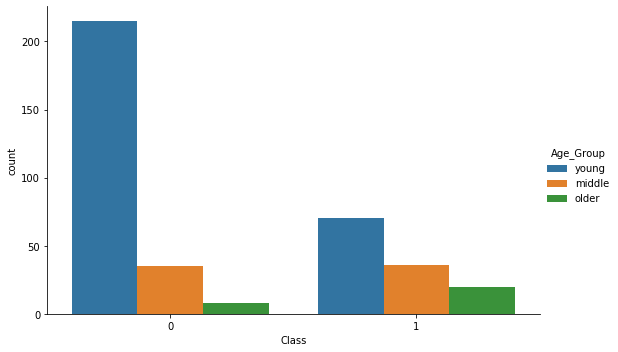

In [34]:
#create catplot for patients splitt into age_group,and Class (0 = nondiabetic, 1 = diabetic)
sns.catplot('Class',data = Pima1, kind='count', hue='Age_Group', order=[0,1], hue_order = ['young', 'middle','older'],aspect=1.5)


#### Figure 5. Chart describing the patients Age group by Class category. 0=nondiabetic, 1= diabetic

In [35]:
#Determine the number of young, middle,and older patients
Pima1['Age_Group'].value_counts()

young     285
middle     71
older      28
Name: Age_Group, dtype: int64

In [36]:
#create a function to define patients by BMI Class (< 18, > 18 but <  25, >25 but < 30, > 30 but < 40,  and >40.)
def underweight_healthy_overweight_obese_exobese(patient):
    BMI = patient
    if BMI < 18 :return 'underweight'
    if 18 < BMI < 25:return 'healthy'
    if 24 < BMI < 29: return 'overweight'
    if 29 < BMI < 39: return 'obese'
    if BMI > 39 :return 'exobese'
        

In [37]:
# add a column to Pima1 describing 'BMI_scale'
Pima1['BMI_scale']=Pima1['BMI'].apply(underweight_healthy_overweight_obese_exobese)

C:\Users\Alberto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
Pima1.head()

,Patient_num,Pregnancies,Plasma_Glucose,Dia_BP,Tri_skin_mm,Serum_insulin,BMI,Dia_pedi_funct,Age,Class,Age_Group,BMI_scale
3,4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,young,overweight
4,5,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,young,exobese
6,7,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,young,obese
8,9,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,older,obese
13,14,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,older,obese


In [39]:
#create a function to define patients by diabetic Class (< 1= nondiabetic, >0 = diabetic.)
def nondiabetic_diabetic(patient):
    Class = patient
    if Class < 1 :return 'nondiabetic'
    if Class > 0 :return 'diabetic'
    

In [40]:
# add a column to Pima1 describing 'diagnosis'
Pima1['Diagnosis']=Pima1['Class'].apply(nondiabetic_diabetic)

C:\Users\Alberto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
Pima1.head()

,Patient_num,Pregnancies,Plasma_Glucose,Dia_BP,Tri_skin_mm,Serum_insulin,BMI,Dia_pedi_funct,Age,Class,Age_Group,BMI_scale,Diagnosis
3,4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,young,overweight,nondiabetic
4,5,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,young,exobese,diabetic
6,7,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,young,obese,diabetic
8,9,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,older,obese,diabetic
13,14,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,older,obese,diabetic


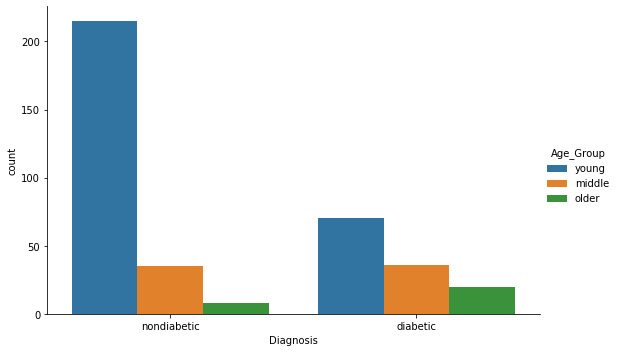

In [42]:
#create catplot for patients splitt into young,middle, older, and Diagnosis
sns.catplot('Diagnosis',data = Pima1, kind='count', hue='Age_Group',  hue_order = ['young', 'middle','older'],aspect=1.5)

#### Figure 6. Chart describing the patients Age group by diagnosis based on the  Class category. 

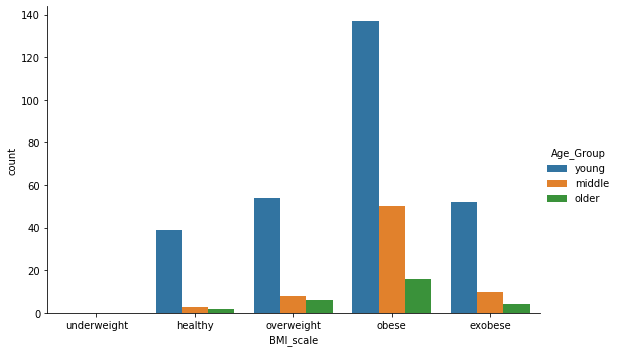

In [43]:
#create catplot for patients splitt into young,middle, older, and BMI_Scale
sns.catplot('BMI_scale',data = Pima1, kind='count', hue='Age_Group',order=['underweight','healthy','overweight','obese','exobese'],  hue_order = ['young', 'middle','older'],aspect=1.5)

#### Figure 7. Chart describing the patients age group by the BMI Scale. We can see that 1. there are no underweight patients, 2. in all BMI scale categories young patients contain the higest number, followed by middle aged, and older patients respectively.

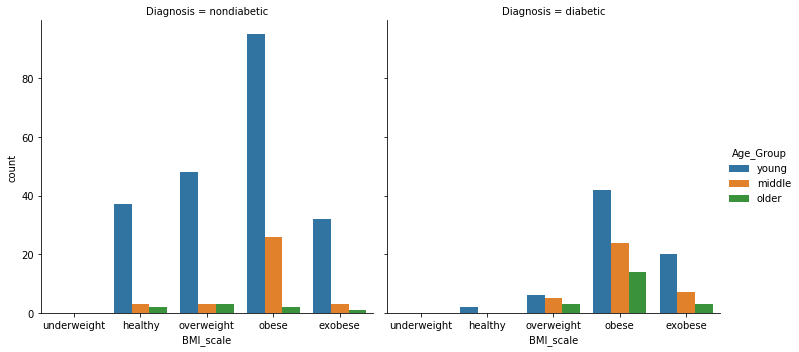

In [44]:
# split the patients  into nondiabetic or diabetic 
sns.catplot('BMI_scale', data=Pima1, kind='count', hue = 'Age_Group', col='Diagnosis', order=['underweight','healthy','overweight','obese','exobese'],
              hue_order = ['young', 'middle','older'], aspect=1, height=5)

#### Figure 8. Two charts, one for each Diagnosis caterog (non diabetes & diabetes). The charts describe the patient population by Age Group and BMI scale based on whether they are diabetic or not.

### Other factors that may affect the diabetic status of patients
#### Look at the number of pregnancies in the patients

Text(0.5, 1.0, 'Distribution of Patient Pregnancies')

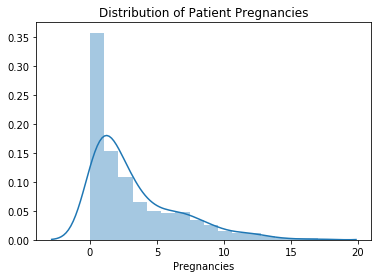

In [45]:
# plot the age distribution with an overlay of density plot
Preg=Pima1['Pregnancies']
Preg_dist = sns.distplot(Preg)
Preg_dist.set_title("Distribution of Patient Pregnancies")

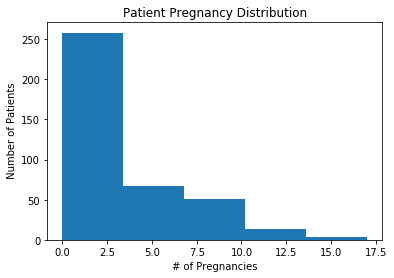

In [46]:
# plot the distribution of pregnanacies using matplotlib.pyplot
plt.hist(Pima1['Pregnancies'],bins=5)
plt.title("Patient Pregnancy Distribution")
plt.xlabel("# of Pregnancies")
plt.ylabel(" Number of Patients")
plt.show()

In [47]:
# Obtain descriptive statistics about the patients' pregnancies
Pima1.Pregnancies.describe()

count    392.000000
mean       3.301020
std        3.211424
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [48]:
#create a function to define patients by the number of prenancies
def None_Low_Medium_MedHigh_High(patient):
    Pregnancies = patient
    if Pregnancies < 1 :return 'none'
    if 0 < Pregnancies < 5:return 'Low'
    if 4 < Pregnancies < 9: return 'Medium'
    if 8 < Pregnancies < 13: return 'MedHigh'
    if Pregnancies > 13 :return 'High'

In [49]:
# add a column to the data frame describing the pregnancie scale.
Pima1['Preg_scale']=Pima1['Pregnancies'].apply(None_Low_Medium_MedHigh_High)
Pima1.head()

C:\Users\Alberto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Patient_num,Pregnancies,Plasma_Glucose,Dia_BP,Tri_skin_mm,Serum_insulin,BMI,Dia_pedi_funct,Age,Class,Age_Group,BMI_scale,Diagnosis,Preg_scale
3,4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,young,overweight,nondiabetic,Low
4,5,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,young,exobese,diabetic,none
6,7,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,young,obese,diabetic,Low
8,9,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,older,obese,diabetic,Low
13,14,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,older,obese,diabetic,Low


In [50]:
#Determine the number of patients in each prenancy category
Pima1['Preg_scale'].value_counts()

Low        229
Medium      74
none        56
MedHigh     27
High         3
Name: Preg_scale, dtype: int64

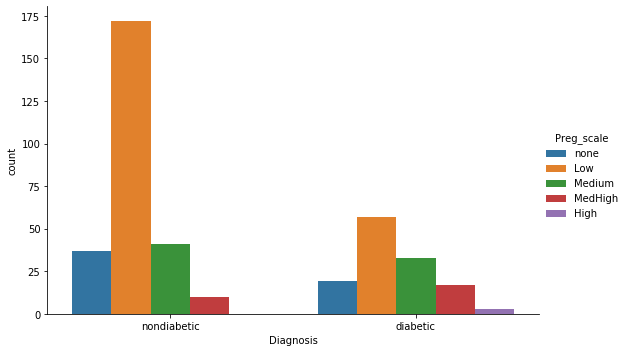

In [51]:
#create catplot for patients splitt into young,middle, older, and Diagnosis
sns.catplot('Diagnosis',data = Pima1, kind='count', hue='Preg_scale',  hue_order = ['none','Low', 'Medium', 'MedHigh','High'],aspect=1.5)

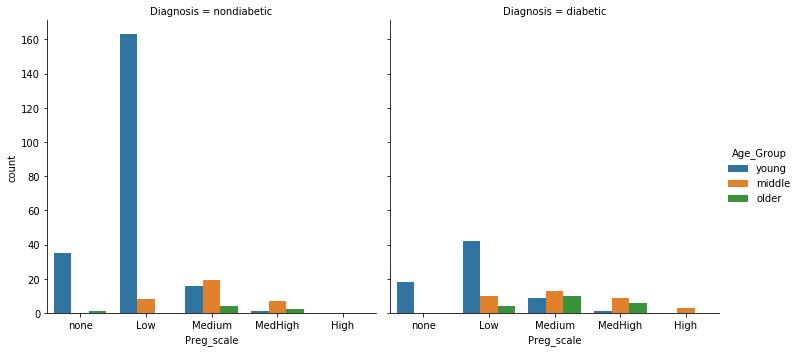

In [52]:
# split the patients  into nondiabetic or diabetic 
sns.catplot('Preg_scale', data=Pima1, kind='count', hue = 'Age_Group', col='Diagnosis', order=['none','Low','Medium','MedHigh','High'],
              hue_order = ['young', 'middle','older'], aspect=1, height=5)

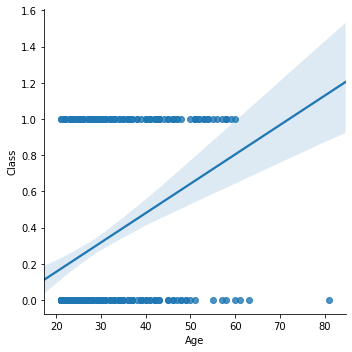

In [53]:
#plot a linear plot of patient Diagnosis
sns.lmplot('Age','Class', data=Pima1)

#### Line plot showing the relationship between patients age and Diabetic insidence. A positive relation ship exist as the patients age.

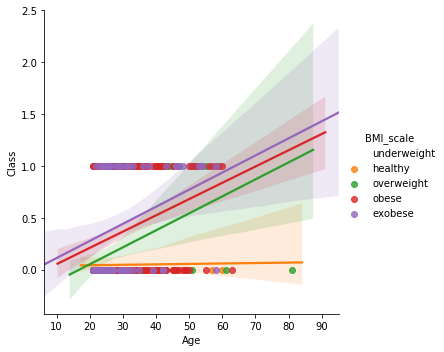

In [54]:
# linear plot of patients Diabetic Diagnosis by Age and BMI
sns.lmplot('Age', 'Class', data=Pima1, hue='BMI_scale', hue_order=['underweight','healthy','overweight','obese','exobese'])


#### Line plot showing the relationship between patients age and Diabetic insidence by BMI scale. A positive relation ship exist as the patients age BMI increases.

### KDE Plot (kernle density estimate plot)
#### KDE plot is used for visualizing the probability density of a continuous variable. It depicts the probability density at different values in a continuous variable.

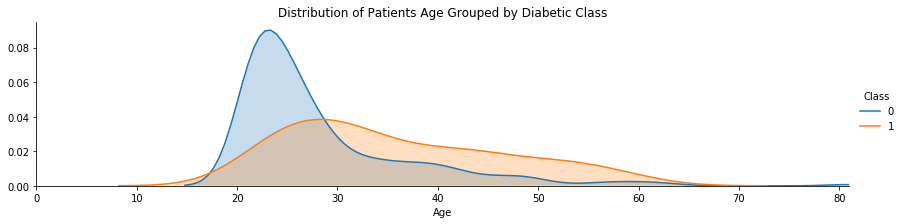

In [55]:
# KDE plot grouped by diabetic class
fig = sns.FacetGrid(Pima1, hue='Class', aspect=4)
fig.map(sns.kdeplot,'Age', shade=True)
oldest = Pima1['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Patients Age Grouped by Diabetic Class')
fig.add_legend()

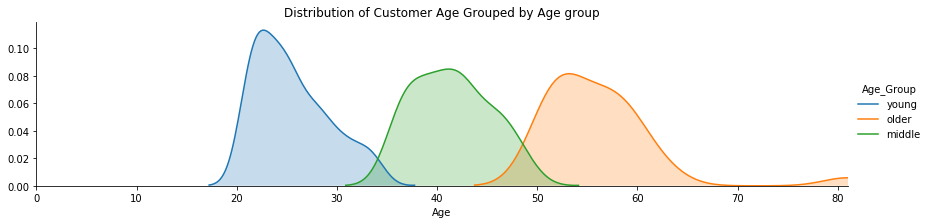

In [56]:
# Kde Plot grouped by age group
fig = sns.FacetGrid(Pima1, hue='Age_Group', aspect=4)
fig.map(sns.kdeplot,'Age', shade=True)
oldest = Pima1['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Customer Age Grouped by Age group')
fig.add_legend()

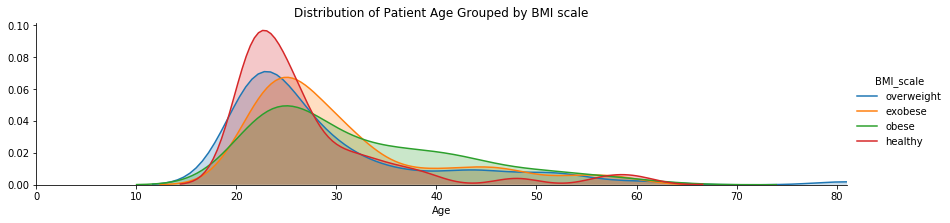

In [57]:
# Kde Plot grouped by BMI Sclae
fig = sns.FacetGrid(Pima1, hue='BMI_scale', aspect=4)
fig.map(sns.kdeplot,'Age', shade=True)
oldest = Pima1['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Patient Age Grouped by BMI scale')
fig.add_legend()

### Classification to predict diabetic class

In [58]:
# confirm the beggining of the dataset 
Pima1.head()

,Patient_num,Pregnancies,Plasma_Glucose,Dia_BP,Tri_skin_mm,Serum_insulin,BMI,Dia_pedi_funct,Age,Class,Age_Group,BMI_scale,Diagnosis,Preg_scale
3,4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,young,overweight,nondiabetic,Low
4,5,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,young,exobese,diabetic,none
6,7,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,young,obese,diabetic,Low
8,9,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,older,obese,diabetic,Low
13,14,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,older,obese,diabetic,Low


In [59]:
# look at column names only
Pima1.columns

Index(['Patient_num', 'Pregnancies', 'Plasma_Glucose', 'Dia_BP', 'Tri_skin_mm',
       'Serum_insulin', 'BMI', 'Dia_pedi_funct', 'Age', 'Class', 'Age_Group',
       'BMI_scale', 'Diagnosis', 'Preg_scale'],
      dtype='object')

### Feature Selection

In [60]:
# create variable for selected features
features = Pima1.iloc[:, 1:9]
print('Summary of Feature Sample')
features.head(5)

Summary of Feature Sample


,Pregnancies,Plasma_Glucose,Dia_BP,Tri_skin_mm,Serum_insulin,BMI,Dia_pedi_funct,Age
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59


In [61]:
# Select the dependent variable
depVar= Pima1['Class']
print('Summary of Dependant Variable')
depVar.head(5)

Summary of Dependant Variable


3     0
4     1
6     1
8     1
13    1
Name: Class, dtype: int64

In [62]:
# Define the X Training Set with variable = (feature Space: [:] )to select all the rowsX Training)
X_train = (features [:])
X_train_count=X_train.index
print('The number of observation used in the x training set are:',str(X_train_count))
X_train.head()

The number of observation used in the x training set are: Int64Index([  3,   4,   6,   8,  13,  14,  16,  18,  19,  20,
            ...
            744, 745, 747, 748, 751, 753, 755, 760, 763, 765],
           dtype='int64', length=392)


,Pregnancies,Plasma_Glucose,Dia_BP,Tri_skin_mm,Serum_insulin,BMI,Dia_pedi_funct,Age
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59


In [63]:
X_train.tail()

,Pregnancies,Plasma_Glucose,Dia_BP,Tri_skin_mm,Serum_insulin,BMI,Dia_pedi_funct,Age
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30


In [64]:
# Define the Y training set to include all rows and mathch the X training set
Y_train = (depVar[:])
Y_train_count= len(Y_train.index)
print('The number of observations used in the Y training set are:', str(Y_train_count))
Y_train.head()

The number of observations used in the Y training set are: 392


3     0
4     1
6     1
8     1
13    1
Name: Class, dtype: int64

In [65]:
Y_train.tail()

753    1
755    1
760    0
763    0
765    0
Name: Class, dtype: int64

### Since this is a classification problem the tools needed must be imported. These include: the classfication algorithms, packages to determine the model metrics, the rescaling fuction, and the cross validation function 

In [66]:
# For classification problem ensure classification algorithms are imported
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# used to determine classification model metrics
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve

# for rescaling of features use a scaler
from sklearn.preprocessing import RobustScaler

#cross validation
from sklearn.model_selection import train_test_split

In [67]:
# To Continue working toward our predictive model cross validation can now be applyed.
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.3)

In [68]:
# use shape function to double check that the split was made as needed
print (X_train.shape)
print (X_test.shape)

(274, 8)
(118, 8)


In [69]:
print (Y_train.shape)
print (Y_test.shape)

(274,)
(118,)


In [70]:
# Establish the variable names that will represent each model
modelLR = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 700, n_jobs = 1, random_state = 15)
modelRF = RandomForestClassifier(n_estimators = 100)
modelSVM = SVC(gamma = 'scale')
modelADA = AdaBoostClassifier()
modelGB = GradientBoostingClassifier()

In [71]:
# fuction for creating confusion matrix for each model
def Cmatrix (CM, labels =  ['nondiabetic', 'diabetic']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [72]:
 # creating data frame for evaluation of metrics for all models
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall'],
                      columns = ['LogisticReg', 'Random Forest', 'Adaboost', 'Gradient Boosting'])

In [73]:
# creating data frame for evaluation of metrics for all models with RFE
metrics2 = pd.DataFrame(index=['accuracy', 'precision', 'recall'],
                      columns = ['RFECV_LogisticReg', 'RFECV_Random Forest', 'RFECV_Adaboost', 'RFECV_Gradient Boosting'])

### Pass the training data thru the classifier algorithms

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
# Logistic Regression Classifier Model Fitting
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
score=np.mean(cross_val_score(modelLR, X_train,Y_train, scoring ='accuracy', cv= crossvalidation))
print('Acuracy: %.3f' % score)

#use the training data to train the estimator
modelLR.fit(X_train,Y_train)

# making predictions and evaluating the model
y_pred_test = modelLR.predict(X_test)
metrics.loc['accuracy', 'LogisticReg']= accuracy_score(y_pred= y_pred_test, y_true=Y_test)
metrics.loc['precision','LogisticReg']= precision_score(y_pred= y_pred_test, y_true=Y_test)
metrics.loc['recall', 'LogisticReg']= recall_score(y_pred= y_pred_test, y_true=Y_test)

# confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=Y_test)
Cmatrix(CM)

Acuracy: 0.792


PREDICTION,nondiabetic,diabetic,Total
nondiabetic,61,13,74
diabetic,18,26,44
Total,79,39,118


### Use Recursive Feature Elimination with Logistic Regression classifier (to see if model improves)¶

In [76]:
# import RFE module
from sklearn.feature_selection import RFECV

In [77]:
# Use Recursive Feature elimination with cross validation for feature selection
rfecv_LR = RFECV(estimator = modelLR, step =1, cv = 5, scoring = 'accuracy')
rfecv_LR = rfecv_LR.fit(X_train, Y_train)
print('Optimal number of features:', rfecv_LR.n_features_)
print('Best features:', X_train.columns [rfecv_LR.support_] )

Optimal number of features: 5
Best features: Index(['Plasma_Glucose', 'Dia_BP', 'BMI', 'Dia_pedi_funct', 'Age'], dtype='object')


In [78]:
# look at the RFE socores
rfecv_LR.grid_scores_

array([0.68244829, 0.64951419, 0.72999278, 0.76305435, 0.78064454,
       0.77330447, 0.77700818, 0.77700818])

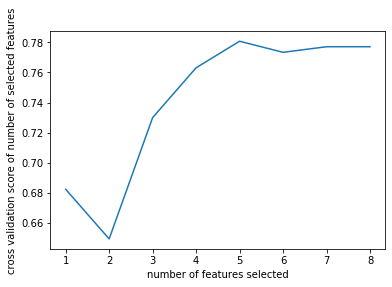

In [79]:
# plot the RFE scores vs the number of selected features
plt.figure()
plt.xlabel("number of features selected")
plt.ylabel("cross validation score of number of selected features")
plt.plot(range(1, len(rfecv_LR.grid_scores_) +1), rfecv_LR.grid_scores_)
plt.show()

In [80]:
# Fit the RFE feature elimination resutl thru the classifier but first we must transform the X_train and X_test to be able to
# to use the RFE results.

X_train_rfecv_LR = rfecv_LR.transform(X_train)
X_test_rfecv_LR = rfecv_LR.transform(X_test)

In [81]:
# Logistic Regression Classifier Model Fitting to the RFE
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
score=np.mean(cross_val_score(modelLR, X_train_rfecv_LR,Y_train, scoring ='accuracy', cv= crossvalidation))
print('Acuracy: %.3f' % score)

#use the training data to train the estimator
model_rfecv_LR  = modelLR.fit(X_train_rfecv_LR,Y_train)

# making predictions and evaluating the model
y_pred_test = model_rfecv_LR.predict(X_test_rfecv_LR)
metrics2.loc['accuracy', 'RFECV_LogisticReg']= accuracy_score(y_pred= y_pred_test, y_true=Y_test)
metrics2.loc['precision','RFECV_LogisticReg']= precision_score(y_pred= y_pred_test, y_true=Y_test)
metrics2.loc['recall', 'RFECV_LogisticReg']= recall_score(y_pred= y_pred_test, y_true=Y_test)

# confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=Y_test)
Cmatrix(CM)

Acuracy: 0.806


PREDICTION,nondiabetic,diabetic,Total
nondiabetic,61,13,74
diabetic,17,27,44
Total,78,40,118


### Random Forest

In [82]:
# Random Forest Classifier Model Fitting
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
score=np.mean(cross_val_score(modelRF, X_train,Y_train, scoring ='accuracy', cv= crossvalidation))
print('Acuracy: %.3f' % score)

#use the training data to train the estimator
modelRF.fit(X_train,Y_train)

# making predictions and evaluating the model
y_pred_test = modelRF.predict(X_test)
metrics.loc['accuracy', 'Random Forest']= accuracy_score(y_pred= y_pred_test, y_true=Y_test)
metrics.loc['precision','Random Forest']= precision_score(y_pred= y_pred_test, y_true=Y_test)
metrics.loc['recall', 'Random Forest']= recall_score(y_pred= y_pred_test, y_true=Y_test)

# confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=Y_test)
Cmatrix(CM)

Acuracy: 0.788


PREDICTION,nondiabetic,diabetic,Total
nondiabetic,63,11,74
diabetic,15,29,44
Total,78,40,118


### Use Recursive Feature Elimination with Random Forest classifier (to see if model improves)

In [83]:
# Use Recursive Feature elimination with cross validation for feature selection
rfecv_RF = RFECV(estimator = modelRF, step =1, cv = 5, scoring = 'accuracy')
rfecv_RF = rfecv_RF.fit(X_train, Y_train)
print('Optimal number of features:', rfecv_RF.n_features_)
print('Best features:', X_train.columns [rfecv_RF.support_])

Optimal number of features: 6
Best features: Index(['Plasma_Glucose', 'Dia_BP', 'Serum_insulin', 'BMI', 'Dia_pedi_funct',
       'Age'],
      dtype='object')


In [84]:
# look at the RFE socores
rfecv_RF.grid_scores_

array([0.76253247, 0.71934103, 0.79242184, 0.78871813, 0.8034632 ,
       0.80716691, 0.78878307, 0.78130832])

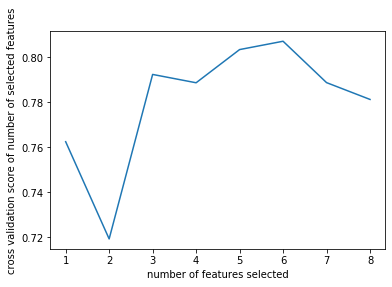

In [85]:
# plot the RFE scores vs the number of selected features
plt.figure()
plt.xlabel("number of features selected")
plt.ylabel("cross validation score of number of selected features")
plt.plot(range(1, len(rfecv_RF.grid_scores_) +1), rfecv_RF.grid_scores_)
plt.show()

In [86]:
# Fit the RFE feature elimination resutl thru the classifier but first we must transform the X_train and X_test to be able to
# to use the RFE results.

X_train_rfecv_RF = rfecv_RF.transform(X_train)
X_test_rfecv_RF = rfecv_RF.transform(X_test)

In [87]:
# Random Forest Classifier Model Fitting to the RFE
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
score=np.mean(cross_val_score(modelRF, X_train_rfecv_RF,Y_train, scoring ='accuracy', cv= crossvalidation))
print('Acuracy: %.3f' % score)

#use the training data to train the estimator
model_rfecv_RF  = modelRF.fit(X_train_rfecv_RF,Y_train)

# making predictions and evaluating the model
y_pred_test = model_rfecv_RF.predict(X_test_rfecv_RF)
metrics2.loc['accuracy', 'RFECV_Random Forest']= accuracy_score(y_pred= y_pred_test, y_true=Y_test)
metrics2.loc['precision','RFECV_Random Forest']= precision_score(y_pred= y_pred_test, y_true=Y_test)
metrics2.loc['recall', 'RFECV_Random Forest']= recall_score(y_pred= y_pred_test, y_true=Y_test)

# confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=Y_test)
Cmatrix(CM)

Acuracy: 0.803


PREDICTION,nondiabetic,diabetic,Total
nondiabetic,65,9,74
diabetic,16,28,44
Total,81,37,118


### Adaboost Classifier

In [88]:
# Adaboost Classifier Model Fitting
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
score=np.mean(cross_val_score(modelADA, X_train,Y_train, scoring ='accuracy', cv= crossvalidation))
print('Acuracy: %.3f' % score)

#use the training data to train the estimator
modelADA.fit(X_train,Y_train)

# making predictions and evaluating the model
y_pred_test = modelADA.predict(X_test)
metrics.loc['accuracy', 'Adaboost']= accuracy_score(y_pred= y_pred_test, y_true=Y_test)
metrics.loc['precision','Adaboost']= precision_score(y_pred= y_pred_test, y_true=Y_test)
metrics.loc['recall', 'Adaboost']= recall_score(y_pred= y_pred_test, y_true=Y_test)

# confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=Y_test)
Cmatrix(CM)

Acuracy: 0.763


PREDICTION,nondiabetic,diabetic,Total
nondiabetic,58,16,74
diabetic,14,30,44
Total,72,46,118


In [89]:
# Use Recursive Feature elimination with cross validation for feature selection
rfecv_ADA = RFECV(estimator = modelADA, step =1, cv = 5, scoring = 'accuracy')
rfecv_ADA = rfecv_ADA.fit(X_train, Y_train)
print('Optimal number of features:', rfecv_ADA.n_features_)
print('Best features:', X_train.columns [rfecv_ADA.support_])

Optimal number of features: 5
Best features: Index(['Plasma_Glucose', 'Serum_insulin', 'BMI', 'Dia_pedi_funct', 'Age'], dtype='object')


In [90]:
# look at the RFE socores
rfecv_ADA.grid_scores_

array([0.62815777, 0.73753247, 0.7407696 , 0.74130111, 0.7703343 ,
       0.76657047, 0.73349928, 0.75208273])

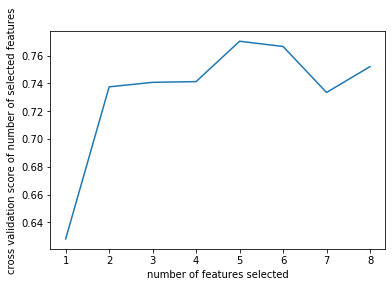

In [91]:
# plot the RFE scores vs the number of selected features
plt.figure()
plt.xlabel("number of features selected")
plt.ylabel("cross validation score of number of selected features")
plt.plot(range(1, len(rfecv_ADA.grid_scores_) +1), rfecv_ADA.grid_scores_)
plt.show()

In [92]:
# Fit the RFE feature elimination resutl thru the classifier but first we must transform the X_train and X_test to be able to
# to use the RFE results.

X_train_rfecv_ADA = rfecv_ADA.transform(X_train)
X_test_rfecv_ADA = rfecv_ADA.transform(X_test)

In [93]:
# Adaboost Classifier Model Fitting to the RFE
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
score=np.mean(cross_val_score(modelADA, X_train_rfecv_ADA,Y_train, scoring ='accuracy', cv= crossvalidation))
print('Acuracy: %.3f' % score)

#use the training data to train the estimator
model_rfecv_ADA  = modelADA.fit(X_train_rfecv_ADA,Y_train)

# making predictions and evaluating the model
y_pred_test = model_rfecv_ADA.predict(X_test_rfecv_ADA)
metrics2.loc['accuracy', 'RFECV_Adaboost']= accuracy_score(y_pred= y_pred_test, y_true=Y_test)
metrics2.loc['precision','RFECV_Adaboost']= precision_score(y_pred= y_pred_test, y_true=Y_test)
metrics2.loc['recall', 'RFECV_Adaboost']= recall_score(y_pred= y_pred_test, y_true=Y_test)

# confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=Y_test)
Cmatrix(CM)

Acuracy: 0.795


PREDICTION,nondiabetic,diabetic,Total
nondiabetic,56,18,74
diabetic,11,33,44
Total,67,51,118


### Gradient Boosting Classifier

In [94]:
# Gradient Boosting Model Fitting
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
score=np.mean(cross_val_score(modelGB, X_train,Y_train, scoring ='accuracy', cv= crossvalidation))
print('Acuracy: %.3f' % score)

#use the training data to train the estimator
modelGB.fit(X_train,Y_train)

# making predictions and evaluating the model
y_pred_test = modelGB.predict(X_test)
metrics.loc['accuracy', 'Gradient Boosting']= accuracy_score(y_pred= y_pred_test, y_true=Y_test)
metrics.loc['precision','Gradient Boosting']= precision_score(y_pred= y_pred_test, y_true=Y_test)
metrics.loc['recall', 'Gradient Boosting']= recall_score(y_pred= y_pred_test, y_true=Y_test)

# confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=Y_test)
Cmatrix(CM)

Acuracy: 0.763


PREDICTION,nondiabetic,diabetic,Total
nondiabetic,61,13,74
diabetic,18,26,44
Total,79,39,118


In [95]:
# Use Recursive Feature elimination with cross validation for feature selection
rfecv_GB = RFECV(estimator = modelGB, step =1, cv = 5, scoring = 'accuracy')
rfecv_GB = rfecv_GB.fit(X_train, Y_train)
print('Optimal number of features:', rfecv_GB.n_features_)
print('Best features:', X_train.columns [rfecv_GB.support_])

Optimal number of features: 5
Best features: Index(['Plasma_Glucose', 'Serum_insulin', 'BMI', 'Dia_pedi_funct', 'Age'], dtype='object')


In [96]:
# look at the RFE socores
rfecv_GB.grid_scores_

array([0.7479822 , 0.75551708, 0.78481722, 0.79195767, 0.81047379,
       0.77740741, 0.79215488, 0.78475228])

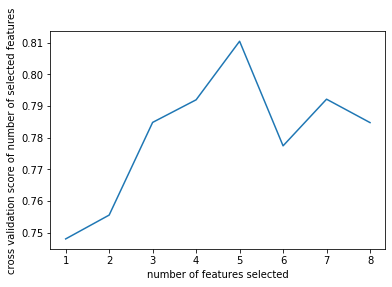

In [97]:
# plot the RFE scores vs the number of selected features
plt.figure()
plt.xlabel("number of features selected")
plt.ylabel("cross validation score of number of selected features")
plt.plot(range(1, len(rfecv_GB.grid_scores_) +1), rfecv_GB.grid_scores_)
plt.show()

In [98]:
# Fit the RFE feature elimination resutl thru the classifier but first we must transform the X_train and X_test to be able to
# to use the RFE results.

X_train_rfecv_GB = rfecv_GB.transform(X_train)
X_test_rfecv_GB = rfecv_GB.transform(X_test)

In [99]:
# Gradient bosting Classifier Model Fitting to the RFE
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
score=np.mean(cross_val_score(modelGB, X_train_rfecv_GB,Y_train, scoring ='accuracy', cv= crossvalidation))
print('Acuracy: %.3f' % score)

#use the training data to train the estimator
model_rfecv_GB  = modelGB.fit(X_train_rfecv_GB,Y_train)

# making predictions and evaluating the model
y_pred_test = model_rfecv_GB.predict(X_test_rfecv_GB)
metrics2.loc['accuracy', 'RFECV_Gradient Boosting']= accuracy_score(y_pred= y_pred_test, y_true=Y_test)
metrics2.loc['precision','RFECV_Gradient Boosting']= precision_score(y_pred= y_pred_test, y_true=Y_test)
metrics2.loc['recall', 'RFECV_Gradient Boosting']= recall_score(y_pred= y_pred_test, y_true=Y_test)

# confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=Y_test)
Cmatrix(CM)

Acuracy: 0.781


PREDICTION,nondiabetic,diabetic,Total
nondiabetic,61,13,74
diabetic,16,28,44
Total,77,41,118


### Model Evaluation

In [100]:
# look at the recorded metrics for the classification models
100*metrics

,LogisticReg,Random Forest,Adaboost,Gradient Boosting
accuracy,73.7288,77.9661,74.5763,73.7288
precision,66.6667,72.5,65.2174,66.6667
recall,59.0909,65.9091,68.1818,59.0909


In [101]:
# Look at the recorded metrics for the classification models with RFE
100*metrics2

,RFECV_LogisticReg,RFECV_Random Forest,RFECV_Adaboost,RFECV_Gradient Boosting
accuracy,74.5763,78.8136,75.4237,75.4237
precision,67.5,75.6757,64.7059,68.2927
recall,61.3636,63.6364,75,63.6364


### Note: Accuracy describes the proportion of the total number of predictions that are corect. Overall how often the model predicts correctly. Precision describes the proportion of positive prediction that are actually correct. when the model predicts diabetic(1) how ofen in the model correct. Recall describes the proportion of positive observed values correctly predicted as such. The proportion of actual diabetic patients the model will correctly predict as such

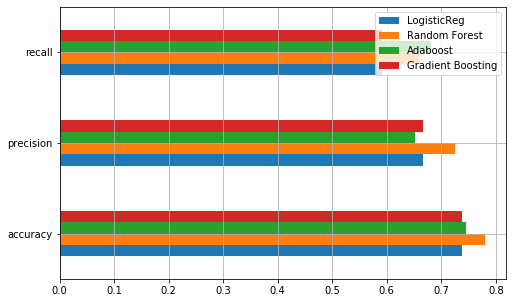

In [102]:
# plot the model metrics for visualization
fig1, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid();

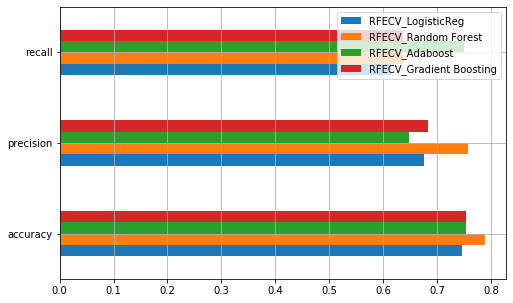

In [103]:
# plot the model metrics2 for models with RFE for  visualization
fig2, ax = plt.subplots(figsize=(8,5))
metrics2.plot(kind='barh', ax=ax)
ax.grid();

 ### Based on the metrics I will look at classifiers Random Forest and Gradient boositing with RFECV.

In [104]:
# look at the relationship between precision and recall metrics for RFECV_RF and RFECV_Gradient Boosting
# to determine which is the better model with higher recall score
precision_rfecv_RF, recall_rfecv_RF, threshold_rfecv_RF = precision_recall_curve(y_true=Y_test,
                                                               probas_pred=model_rfecv_RF.predict_proba(X_test_rfecv_RF)
                                                              [:,1])
precision_rfecv_GB, recall_rfecv_GB, threshold_rfecv_GB = precision_recall_curve(y_true=Y_test,
                                                               probas_pred=model_rfecv_GB.predict_proba(X_test_rfecv_GB)[:,1])

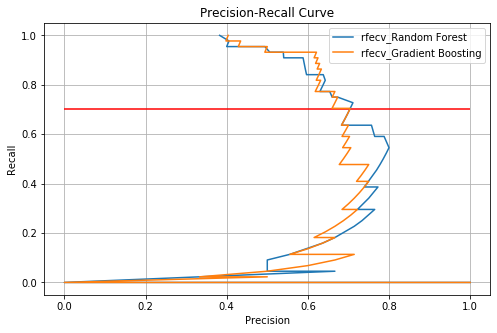

In [105]:
# make a plot using precision and recall metrics for the two models
fig3, ax = plt.subplots(figsize=(8,5))
ax.plot(precision_rfecv_RF, recall_rfecv_RF, label='rfecv_Random Forest')
ax.plot(precision_rfecv_GB, recall_rfecv_GB, label='rfecv_Gradient Boosting')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision-Recall Curve')
ax.hlines(y=0.7, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();
            

### The Precision-Recall Curve shows that for the majority of the precision points the rfecv_Gradient Boosting model has a higher recall. This shows that this is the better model for our predictions.

### Adjusting the Classification Threshold

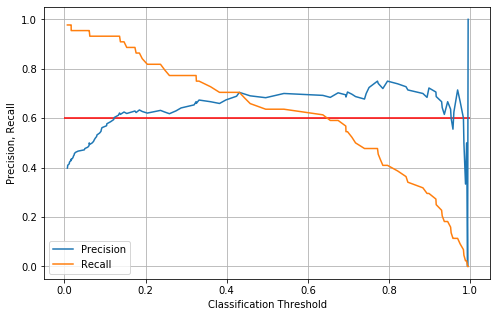

In [106]:
#Looking at the relationship between the  threshold and precision and recall metrics to deterimine 
# the optimal threshold for model_rfecv_GB to have a higher recall score
fig4,ax=plt.subplots(figsize=(8,5))
ax.plot(threshold_rfecv_GB, precision_rfecv_GB[1:], label='Precision')
ax.plot(threshold_rfecv_GB, recall_rfecv_GB[1:], label='Recall')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision, Recall')
ax.hlines(y=0.6, xmin=0,xmax=1, color='red')
ax.legend()
ax.grid();

### Modifiy the rfecv_Gradient Boosting Classifier with to classfication thereshold of 0.2

In [114]:
y_pred_proba = model_rfecv_GB.predict_proba(X_test_rfecv_GB)[:,1]
y_pred_test = (y_pred_proba >=0.15).astype('int')

#confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=Y_test)
print("Recall:", 100*recall_score(y_pred=y_pred_test, y_true=Y_test))
print("Precision:", 100*precision_score(y_pred=y_pred_test, y_true=Y_test))
Cmatrix(CM)


Recall: 90.9090909090909
Precision: 62.5


PREDICTION,nondiabetic,diabetic,Total
nondiabetic,50,24,74
diabetic,4,40,44
Total,54,64,118


### The rfecv_ Gradient Boosting Cassifier with a modified classfication threshold to 0.15 will be used for predictions. This model yields a precision score of 63 % and a recall score of 91%. This means that 91% of the predicted to be diabetic actually are diabetic.¶